<a href="https://colab.research.google.com/github/plaban1981/Multiclass--Logistic-Regression/blob/master/Machine_Learning_with_a_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem description**


 Goal is to predict the binary class heart_disease_present, which represents whether or not a patient has heart disease:

* 0 represents no heart disease present

* 1 represents heart disease present

**Data Description**

There are 14 columns in the dataset, where the patient_id column is a unique and random identifier. The remaining 13 features are described in the section below.

* slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

* thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

* resting_blood_pressure (type: int): resting blood pressure

* chest_pain_type (type: int): chest pain type (4 values)

* num_major_vessels (type: int): number of major vessels (0-3) colored by flourosopy

* fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl

* resting_ekg_results (type: int): resting electrocardiographic results (values 0,1,2)

* serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl

* oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

* sex (type: binary): 0: female, 1: male

* age (type: int): age in years

* max_heart_rate_achieved (type: int): maximum heart rate achieved (beats per minute)

* exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     

Attributes types
-----------------

Real: 1,4,5,8,10,12

Ordered:11,

Binary: 2,6,9

Nominal:7,3,13

Variable to be predicted
------------------------

Absence (0) 

or 

presence (1) 


of heart disease


**Performance metric**

Performance is evaluated according to binary log loss.

The format for the submission file is two columns with the patient_id and heart_disease_present. 

This competition uses log loss as its evaluation metric, so the heart_disease_present values you should submit are the probabilities that a patient has heart disease (not the binary label).

**Importing Libraries**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
from google.colab import files
files.upload()

Saving test_values.csv to test_values.csv


{'test_values.csv': b'patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina\nolalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0\nz9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0\n5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1\nmrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0\nuki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1\nkev1sk,2,normal,122,3,0,0,0,213,0.2,0,43,165,0\n9n6let,3,normal,150,1,0,0,0,226,2.6,0,66,114,0\njxmtyg,2,reversible_defect,140,3,3,0,2,254,2.0,1,69,146,0\n51s2ff,1,normal,138,4,0,0,2,271,0.0,1,59,182,0\nwi9mcs,1,normal,138,3,0,0,2,257,0.0,1,47,156,0\n741h4l,3,normal,130,3,0,0,0,250,3.5,1,37,187,0\n1ef64a,2,reversible_defect,140,3,1,0,0,233,0.6,1,50,163,0\nwa2ix6,1,normal,140,4,0,0,2,261,0.0,1,51,186,1\n8167zl,2,reversible_defect,150,4,3,0

**Importing Data**

In [0]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [7]:
train_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [8]:
train_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In order to analyse the data I will need both the train_values and train_labels to be combined into one dataframe. 

Pandas provides a merge function that will join dataframes on either columns or indexes.

In the following code I am performing an inner merge using the patient_id to join the correct value with the correct labels.

In [11]:
train = pd.merge(train_values,train_labels,how='inner',on='patient_id')
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


**Missing Data-Check**

In [12]:
train.isnull().sum()[train.isnull().sum() !=0]

Series([], dtype: int64)

*No missing data encountered in the training dataset*

**Visualize Data**

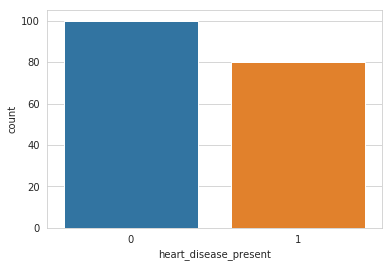

In [13]:
sns.set_style('whitegrid')
sns.countplot('heart_disease_present',data=train)

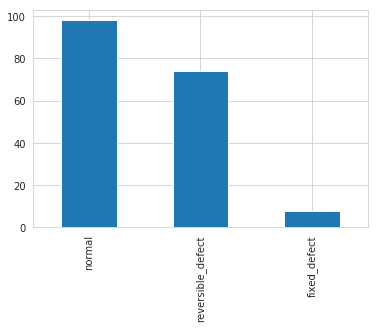

In [15]:
train['thal'].value_counts().plot.bar()

In [0]:
X = train.drop(['patient_id','heart_disease_present'],axis=1)
Y = train['heart_disease_present']

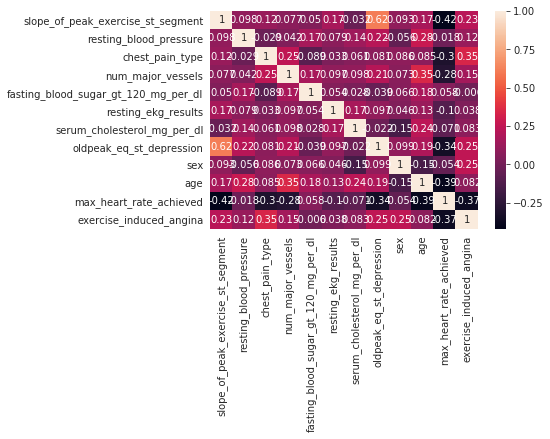

In [23]:
sns.heatmap(X.corr(),annot=True)

Using the groupby function we can plot the mean resting_blood_pressure by slope_of_peak_exercise_st_segment.

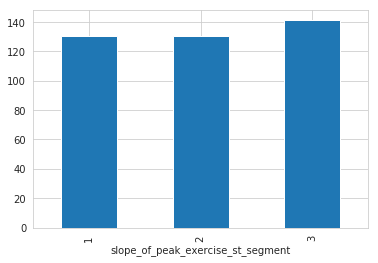

In [24]:
train.groupby("slope_of_peak_exercise_st_segment")['resting_blood_pressure'].mean().plot(kind='bar')

Pandas pivot tables can also be used to provide visualisations of aggregated data. 

Here I am comparing mean serum_cholesterol_mg_per_dl by chest_pain_type and the relationship to heart disease being present.

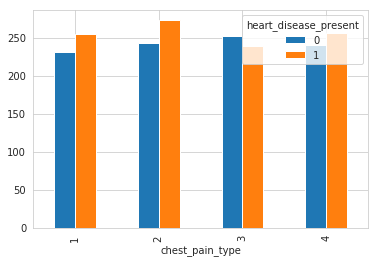

In [25]:
pd.pivot_table(train, index='chest_pain_type', columns= 'heart_disease_present', values= "serum_cholesterol_mg_per_dl", aggfunc=np.mean).plot(kind= 'bar')

In [27]:
train[train.select_dtypes(include=['int64', 'float64']).columns].head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0


**Feature transformation**



In [28]:
train[train.select_dtypes(include=['object']).columns].head()

,patient_id,thal
0,0z64un,normal
1,ryoo3j,normal
2,yt1s1x,normal
3,l2xjde,reversible_defect
4,oyt4ek,reversible_defect


In [57]:
X['thal'].shape

(180,)

In [58]:
thal_encode = pd.get_dummies(X['thal'])
thal_encode.shape

(180, 3)

In [59]:
df = pd.concat([X,thal_encode],axis=1)
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,fixed_defect,normal,reversible_defect
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,0,1,0
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,0,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


In [60]:
df.shape

(180, 16)

In [62]:
df.isnull().sum()[df.isnull().sum() !=0]

Series([], dtype: int64)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 16 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
fixed_defect                            180 non-null uint8
normal                                  180 non-null uint8
reversi

In [64]:
df = df.drop('thal',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
fixed_defect                            180 non-null uint8
normal                                  180 non-null uint8
reversible_defect                       180 non-null uint8
dtypes: 

**Machine Learning using Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [146]:
X_train,X_test,y_train,y_test = train_test_split(df,Y,test_size=0.2,random_state=1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(144, 15) (36, 15)
(144,) (36,)


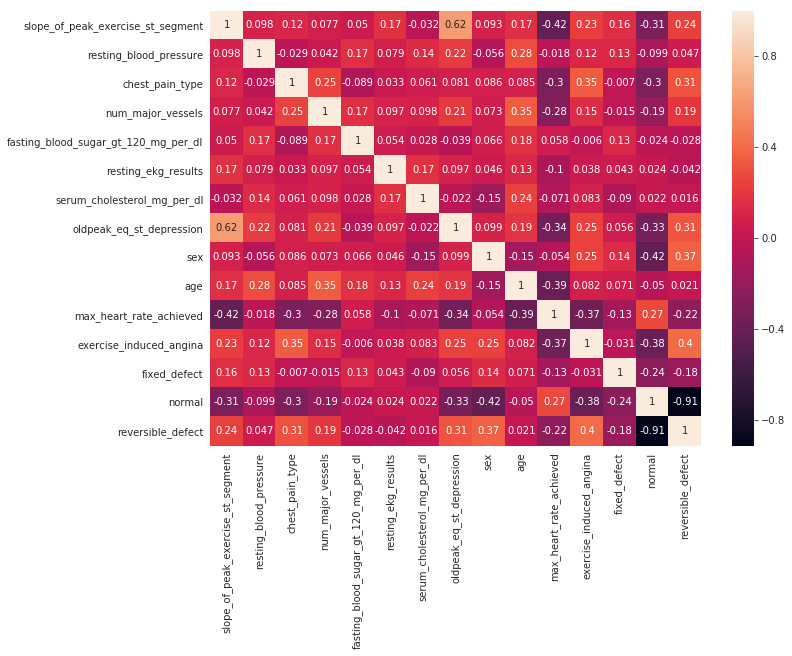

In [70]:
corr = df.corr(method='pearson')
plt.figure(figsize=(11,8))
sns.heatmap(corr,annot=True)

**Build the model**

In [0]:
rf = RandomForestClassifier(random_state=1)

In [0]:
param_grid = {'n_estimators':[10,50,100,150,200],
             'max_depth':[4,6,8,10],
             'max_features': ['auto', 'sqrt', 'log2'],
             'criterion' :['gini', 'entropy']}

In [79]:
cv_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
cv_rf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [4, 6, 8, 10], 'max_features': ['auto', 'sqrt', 'log2'], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
cv_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [0]:
rf = RandomForestClassifier(n_estimators=100,max_depth=6,criterion='entropy',max_features='auto',random_state=1)

In [0]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

In [89]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(accuracy_score(y_test,y_pred))

0.75


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,KFold,cross_val_score
#
import warnings
warnings.filterwarnings("ignore")

In [97]:
# Compare Algorithms

pipelines = []
pipelines.append(("AB",
                  Pipeline([("AB", AdaBoostClassifier())])))
pipelines.append(("GBM",
                  Pipeline([("GBM", GradientBoostingClassifier())])))
pipelines.append(("RF",
                  Pipeline([("RF", RandomForestClassifier())])))
pipelines.append(("ET",
                  Pipeline([("ET", ExtraTreesClassifier())])))

results = []
names = []
num_folds = 10
#
for name,model in pipelines:
    kfold = KFold(n_splits = num_folds,random_state=1)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("Training Accuracy")
    print('='*80)
    msg = f"{name} - results(mean) : {cv_results.mean():f} -results(std): {cv_results.std():f}"
    print(msg)

Training Accuracy
AB - results(mean) : 0.765238 -results(std): 0.091226
Training Accuracy
GBM - results(mean) : 0.820952 -results(std): 0.085136
Training Accuracy
RF - results(mean) : 0.792381 -results(std): 0.078368
Training Accuracy
ET - results(mean) : 0.751429 -results(std): 0.154389


**The best classifier  as determined above - GradientBoostingClassifier**

In [0]:
gbm = GradientBoostingClassifier(random_state=1)
param_grid = {'n_estimators':[10,50,100,150,200],
             'max_depth':[4,6,8,10],
             'max_features': ['auto', 'sqrt', 'log2']}

In [99]:
gbm_cv = GridSearchCV(estimator = gbm,param_grid=param_grid,cv=5)
gbm_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 150, 200], 'max_depth': [4, 6, 8, 10], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
gbm_cv.best_params_

{'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}

In [0]:
gbm = GradientBoostingClassifier(max_depth= 4, max_features= 'sqrt', n_estimators=10,random_state=10)
gbm.fit(X_train,y_train)
y_pred_gbm = gbm.predict(X_test)
y_pred_proba_gbm = gbm.predict_proba(X_test)

In [103]:
print(accuracy_score(y_test,y_pred_gbm))

0.7777777777777778


In [0]:
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits = num_folds,random_state=1)
cv_results = cross_val_score(LogisticRegression(),X_train,y_train,cv=kfold,scoring='accuracy')

In [110]:
cv_results

array([0.8       , 0.6       , 0.73333333, 0.93333333, 0.85714286,
       0.85714286, 1.        , 0.71428571, 1.        , 0.92857143])

In [111]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))

Accuracy: 0.84 (+/- 0.25)


In [0]:
from sklearn.model_selection import cross_val_predict
y_pred_proba = cross_val_predict(LogisticRegression(), X_test, y_test, cv=3,method='predict_proba')

In [0]:
y_pred = cross_val_predict(LogisticRegression(), X_test, y_test, cv=3,method='predict')

In [121]:
print(accuracy_score(y_test,y_pred))

0.7777777777777778


**Using XGBOOSTClassifier Boosting Method of Ensemble model**

In [0]:
from xgboost.sklearn import XGBClassifier
#set the parameters for the xgbosst model
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'class':2,
    'learning_rate': 1.0,
    #'silent': 1.0,
    'n_estimators': 5
}
params['eval_metric'] = ['logloss', 'auc']

In [0]:
xgbst = XGBClassifier(**params).fit(X_train,y_train)

In [0]:
y_pred_xgboost = xgbst.predict(X_test)

In [155]:
y_pred_xgboost

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [154]:
print("Accuracy score:", accuracy_score(y_test, y_pred_xgboost))
print("Classification report")
print(classification_report(y_test, y_pred_xgboost))

Accuracy score: 0.8055555555555556
Classification report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.76      0.81      0.79        16

   micro avg       0.81      0.81      0.81        36
   macro avg       0.80      0.81      0.80        36
weighted avg       0.81      0.81      0.81        36



In [0]:
xgbst_proba = xgbst.predict_proba(X_test)

**Generating Labels for test Data**

In [0]:
df_test= pd.read_csv('test_values.csv')

In [125]:
df_test.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [126]:
df_test.shape

(90, 14)

In [158]:
Xtest = df_test.drop('patient_id',axis=1)
thal_enc = pd.get_dummies(Xtest['thal'])
Xtest = pd.concat([Xtest,thal_enc],axis=1)
Xtest.shape

(90, 16)

In [159]:
Xtest.drop('thal',axis=1,inplace=True)
Xtest.shape

(90, 15)

In [160]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 15 columns):
slope_of_peak_exercise_st_segment       90 non-null int64
resting_blood_pressure                  90 non-null int64
chest_pain_type                         90 non-null int64
num_major_vessels                       90 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    90 non-null int64
resting_ekg_results                     90 non-null int64
serum_cholesterol_mg_per_dl             90 non-null int64
oldpeak_eq_st_depression                90 non-null float64
sex                                     90 non-null int64
age                                     90 non-null int64
max_heart_rate_achieved                 90 non-null int64
exercise_induced_angina                 90 non-null int64
fixed_defect                            90 non-null uint8
normal                                  90 non-null uint8
reversible_defect                       90 non-null uint8
dtypes: float64(1), int64

In [0]:
test_pred_proba = gbm.predict_proba(Xtest)
test_pred  = gbm.predict(Xtest)
xgboost_pred_proba = xgbst.predict_proba(Xtest)

In [162]:
test_pred_proba.shape

(90, 2)

In [0]:
test_predictions  = np.round(test_pred_proba[:,1:],2)
test_predictions_xgboost = np.round(xgboost_pred_proba[:,1:],2)

In [0]:
final_submission = pd.DataFrame({'patent_id':df_test['patient_id'].values,'heart_disease_present':np.ravel(test_predictions)})

In [167]:
final_submission.head()

,patent_id,heart_disease_present
0,olalu7,0.53
1,z9n6mx,0.22
2,5k4413,0.79
3,mrg7q5,0.22
4,uki4do,0.71


In [0]:
final_submission.to_csv('gradient_boosting_classifier_submission.csv',index=False)

In [0]:
final_submission_xgboost = pd.DataFrame({'patent_id':df_test['patient_id'].values,'heart_disease_present':np.ravel(test_predictions_xgboost)})

In [169]:
final_submission_xgboost.head()

,patent_id,heart_disease_present
0,olalu7,0.54
1,z9n6mx,0.13
2,5k4413,0.97
3,mrg7q5,0.02
4,uki4do,0.96


In [0]:
final_submission_xgboost.to_csv('xgboost_classifier_submission.csv',index=False)